# Titanic Kaggle Competition

This is my first Kaggle competition, analyzing and predicting survival data of passengers on the Titantic.

https://www.kaggle.com/c/titanic/

## Setup

In [1]:
%mkdir -p data
%mkdir -p output
%mkdir -p runs

## Analyze the data

#### Load Data

Downloaded the data from https://www.kaggle.com/c/titanic/data into `data/`. Two files `train.csv` and `test.csv`.

In [2]:
import pandas as pd

df = pd.read_csv('./data/train.csv')

### Overview

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Data overview thoughts
Of the 891 passengers...
* All have non-null info on Survived, Pclass, Sex, SibSp, Parch, Ticket, Fare.
* Embarked is only missing 2, so might be worth just dropping those two, if Embarked is useful. Otherwise, dropping the Embarked feature.
* Cabin is mostly nulls, so probably not worth using if only available 22% of the time.
* Age is probably useful, but 20% are missing that field.


In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Contents initial thoughts
* **PClass**. (Ticket Class). Preferential treatment for higher class? Nice simple field to work with.  
* **Name**. Unique. Probably is not useful unless there's some bias in race or class that can be derived from the names. That would involve some deep analysis and probably an external dataset to find name embeddings. Although just the length of the name may indicate something.
* **SibSp** (Siblings + Spouses onboard). Safety in numbers? Would be interesting to correlate this with Name and see if there's any likely holes here.
* **Parch** (Parents + Children onboard). Very similar to SibSp, although from the movies "women and children first" would indicate this carriers more weight for adult females than adults males. Not that useful for children, since we already know they are from their Age. It's also difficult to tell if the person is the parent or the child, as even an adult could be the child. More broadly useful for safety in numbers?
* **Ticket**. Unique? Probably not usual, if unique, unless it indicates more information on where, when, or how the ticket was purchased that would compliment Class. Or if it gives information that relates to the Cabin.
* **Fare**. Relates to the Class. Variability might indicate more granular levels in Class or some preferencial treatment at the time of purchase.
* **Embarked** (Port of Embarkation). Again, this may add colour to the background of person that may have played a part. For instance, would someone with a certain accent be treated differently? Would someone from a different region/climate be more apt to surviving?

### Missing values

In [5]:
df.isnull().sum().sort_values(ascending=True)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
Age            177
Cabin          687
dtype: int64

#### Null Embarked

In [6]:
df[df.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


Both in Cabin B28 and have Fare of 80.0 and same Ticket number. Let's see if we can find similar passengers.

In [7]:
df[(df.Ticket == '113572') | (df.Fare == 80.) | (df.Cabin == 'B28') |
   df.Name.str.startswith('Icard,') | df.Name.str.startswith('Stone,')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [8]:
df[df.Cabin.notnull() & df.Cabin.str.startswith('B') & (df.Sex == 'female') & (df.Fare < 100.)] \
    .sort_values(by='Cabin')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
523,524,1,1,"Hippach, Mrs. Louis Albert (Ida Sophia Fischer)",female,44.0,0,1,111361,57.9792,B18,C
329,330,1,1,"Hippach, Miss. Jean Gertrude",female,16.0,0,1,111361,57.9792,B18,C
781,782,1,1,"Dick, Mrs. Albert Adrian (Vera Gillespie)",female,17.0,1,0,17474,57.0000,B20,S
540,541,1,1,"Crosby, Miss. Harriet R",female,36.0,0,2,WE/P 5735,71.0000,B22,S
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0000,B28,NaN
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0000,B28,NaN
641,642,1,1,"Sagesser, Mlle. Emma",female,24.0,0,0,PC 17477,69.3000,B35,C
369,370,1,1,"Aubart, Mme. Leontine Pauline",female,24.0,0,0,PC 17477,69.3000,B35,C
539,540,1,1,"Frolicher, Miss. Hedwig Margaritha",female,22.0,0,2,13568,49.5000,B39,C
194,195,1,1,"Brown, Mrs. James Joseph (Margaret Tobin)",female,44.0,0,0,PC 17610,27.7208,B4,C


It's hard to tell from the above, whether they're more likely Embarked=S or Embarked=C, but all of these similar women survived, so I think it will have little baring, as long as we choose one of them.

In [9]:
df.loc[df.Embarked.isnull(), 'Embarked'] = 'C'
df.Embarked.isnull().describe()

count       891
unique        1
top       False
freq        891
Name: Embarked, dtype: object

#### Null Age

Determine if there's any honorifics we can use to fill in missing ages

In [10]:
df.loc[df.Name.str.contains(r'\b\w+\.') & df.Age.isnull()] \
    .Name.str.replace(r'.*(\b\w+\.).*', lambda m: m.group(1), regex=True) \
    .unique()

array(['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Dr.'], dtype=object)

In [11]:
df.loc[df.Name.str.contains(r'\bDr\b') & df.Age.isnull()].Name.count()

1

In [12]:
df.loc[df.Name.str.contains(r'\bMaster\b') & df.Age.isnull()].Name.count()

4

In [13]:
df.loc[df.Name.str.contains(r'\bMiss\b') & df.Age.isnull()].Name.count()

36

In [14]:
df.loc[df.Name.str.contains(r'\bMr\b') & df.Age.isnull()].Name.count()

119

In [15]:
df.loc[df.Name.str.contains(r'\bMrs\b') & df.Age.isnull()].Name.count()

17

That covers all the missing items in the training. We'll give them a roughly appropriate age. `Miss` is a little tricky, so let's look at those a bit closer.

In [16]:
miss_null_age_mask = df.Name.str.contains(r'\bMiss\b') & df.Age.isnull()
df.loc[miss_null_age_mask]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
32,33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,NaN,Q
47,48,1,3,"O'Driscoll, Miss. Bridget",female,NaN,0,0,14311,7.7500,NaN,Q
82,83,1,3,"McDermott, Miss. Brigdet Delia",female,NaN,0,0,330932,7.7875,NaN,Q
109,110,1,3,"Moran, Miss. Bertha",female,NaN,1,0,371110,24.1500,NaN,Q
128,129,1,3,"Peter, Miss. Anna",female,NaN,1,1,2668,22.3583,F E69,C
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.5500,NaN,S
198,199,1,3,"Madigan, Miss. Margaret ""Maggie""",female,NaN,0,0,370370,7.7500,NaN,Q
229,230,0,3,"Lefebre, Miss. Mathilde",female,NaN,3,1,4133,25.4667,NaN,S
235,236,0,3,"Harknett, Miss. Alice Phoebe",female,NaN,0,0,W./C. 6609,7.5500,NaN,S


Lots of low `Fare` values here. Let's see if they might be children.

In [17]:
df[df.Age.notnull() & df.Name.str.contains(r'\bMiss\b') & (df.Fare < 10.)] \
    .Age.describe()

count    37.000000
mean     22.418919
std       6.486646
min      13.000000
25%      18.000000
50%      22.000000
75%      25.000000
max      45.000000
Name: Age, dtype: float64

In [18]:
df[df.Age.notnull() & df.Name.str.contains(r'\bMiss\b') & (df.Fare >= 10.) & (df.Fare < 70.)] \
    .Age.describe()

count    74.000000
mean     17.317568
std      13.589965
min       0.750000
25%       5.000000
50%      16.500000
75%      24.750000
max      58.000000
Name: Age, dtype: float64

In [19]:
df[df.Age.notnull() & df.Name.str.contains(r'\bMiss\b') & (df.Fare >= 70.) & (df.Fare < 80.)] \
    .Age.describe()

count     7.000000
mean     35.714286
std      16.918572
min      18.000000
25%      23.500000
50%      32.000000
75%      45.000000
max      63.000000
Name: Age, dtype: float64

In [20]:
df[df.Age.notnull() & df.Name.str.contains(r'\bMiss\b') & (df.Fare >= 100.)] \
    .Age.describe()

count    21.000000
mean     28.952381
std      12.179804
min       2.000000
25%      22.000000
50%      30.000000
75%      36.000000
max      58.000000
Name: Age, dtype: float64

There's also a `Ms` in the test data with a null value.

In [21]:
df[df.Age.notnull() & df.Name.str.contains(r'\bMs\b')].Age.describe()

count     1.0
mean     28.0
std       NaN
min      28.0
25%      28.0
50%      28.0
75%      28.0
max      28.0
Name: Age, dtype: float64

### Dig into the data

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

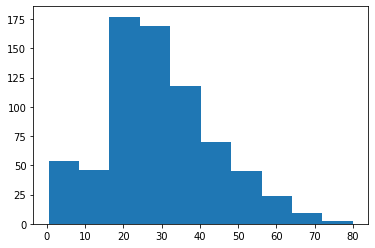

In [23]:
plt.hist(df.Age)

In [24]:
died = (df.Survived == 0.).sum()
survived = (df.Survived == 1.).sum()
percent_died = 100. * died / (died + survived)
print(f'{died} died ({percent_died:0.1f}%). {survived} survived ({100. - percent_died:0.1f}%)')

549 died (61.6%). 342 survived (38.4%)


In [25]:
df.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

### Age Groups
Let's just use Fibonacci for now. Looks about right. Life expectancy of white men and women around 1912 was around 50-55 years old.

In [26]:
age_bins = [0., 1., 2., 3., 5., 8., 13., 21., 34., 55., 89.]
age_group_labels = [f'Under {b}' for b in age_bins[1:]]
df['AgeGroup'] = pd.cut(df.Age, bins=age_bins, labels=age_group_labels)

<AxesSubplot:>

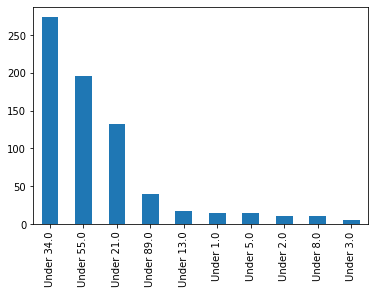

In [27]:
df['AgeGroup'].value_counts().plot.bar()

In [28]:
age_group_survived = df['AgeGroup'].where(df['Survived'] == 1.).value_counts()
age_group_died = df['AgeGroup'].where(df['Survived'] == 0.).value_counts()
age_group_survived_df = pd.DataFrame({
    'Survived': age_group_survived,
    'Died': age_group_died,
}, index=df['AgeGroup'].cat.categories)

In [29]:
age_group_survived_df

,Survived,Died
Under 1.0,12,2
Under 2.0,3,7
Under 3.0,5,1
Under 5.0,11,3
Under 8.0,5,5
Under 13.0,6,11
Under 21.0,45,88
Under 34.0,109,165
Under 55.0,82,114
Under 89.0,12,28


<AxesSubplot:>

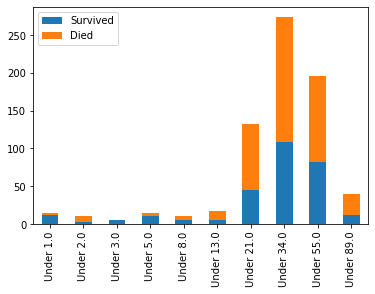

In [30]:
age_group_survived_df.plot.bar(stacked=True)

In [31]:
age_group_survived_df['DeathRate'] = 100. * age_group_survived_df['Died']\
    / (age_group_survived_df['Died'] + age_group_survived_df['Survived'])
age_group_survived_df['DeathRate']

Under 1.0     14.285714
Under 2.0     70.000000
Under 3.0     16.666667
Under 5.0     21.428571
Under 8.0     50.000000
Under 13.0    64.705882
Under 21.0    66.165414
Under 34.0    60.218978
Under 55.0    58.163265
Under 89.0    70.000000
Name: DeathRate, dtype: float64

#### Death rate by age thoughts
* Under 8 years old is generally better for survival. In practically it probably on the survival of the parent and the parent probably gets better treatment if they they have children.
* Older than 55 has highest rate of mortality. This is inline with life-expectancy at the time.
* Worst is between 1 and 2 (small but active?) and 55-89 (slow to move?).

_Note: I played with the age groups a little and didn't find any particular benefit to using non-fibonacci buckets, though will use less buckets in lower ages_

### Pclass (Ticket Class) Analysis

In [32]:
import seaborn as sns

# some plots derived from https://seaborn.pydata.org/generated/seaborn.countplot.html

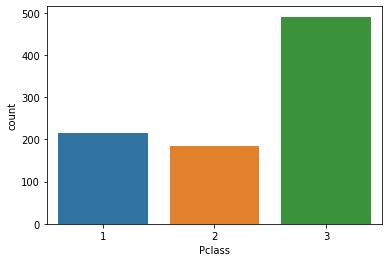

In [33]:
ax = sns.countplot(x='Pclass', data=df)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

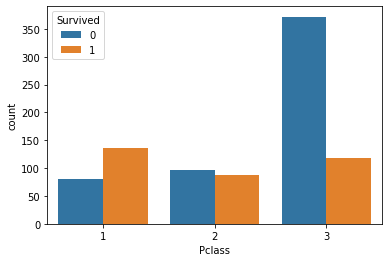

In [34]:
sns.countplot(x="Pclass", hue="Survived", data=df)

#### Huge bias for dying in 3rd Class


In [35]:
predictability = 0.
for c in [1, 2, 3]:
    in_class = df['Survived'].where(df['Pclass'] == c)
    died = in_class.where(df['Survived'] == 0.).count()
    survived = in_class.where(df['Survived'] == 1.).count()
    class_death_rate = died / (died + survived)
    prob_of_class = in_class.count() / len(df)
    if c == 1:
        # Let's always guess that 1st Class survives.
        # We'll be right most of the time.
        class_predictability = 1. - class_death_rate
    elif c == 2:
        # Let's always guess that 2nd Class dies.
        # We'll be right slightly more than we're wrong.
        class_predictability = class_death_rate
    elif c == 3:
        # Let's always guess that 3rd Class dies.
        # We'll be right most of the time.
        class_predictability = class_death_rate
        
    predictability += class_predictability * prob_of_class
    print((c, died, survived, class_death_rate, prob_of_class, class_predictability))

print(f'Predictability of death based on class data alone is {100. * predictability:0.1f}%')

(1, 80, 136, 0.37037037037037035, 0.24242424242424243, 0.6296296296296297)
(2, 97, 87, 0.5271739130434783, 0.20650953984287318, 0.5271739130434783)
(3, 372, 119, 0.7576374745417516, 0.5510662177328844, 0.7576374745417516)
Predictability of death based on class data alone is 67.9%


Even the most basic model that always predicted you'd die in 3rd Class would be 75.76% accurate for just that class. Overall we could use this data to get 67.9% accuracy.

<AxesSubplot:xlabel='CabinLetter', ylabel='count'>

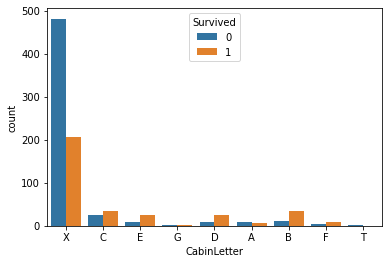

In [36]:
# Let's look at cabin letters, replacing NaN with 'X'
df['CabinLetter'] = df.Cabin.str.slice(stop=1).fillna('X')

sns.countplot(x="CabinLetter", hue="Survived", data=df)

Seems like there's a lot of Xs (NaN / no cabin letter) and those have a much higher mortality rate than defined cabins.

#### Embarked

In [37]:
df.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

## Model
It would be good to start cleaning the data and get basic model going.
Let's train on the following fields for now...
* PClass. One-hot encode.
* Sex. Convert to Male (0. or 1.)
* Age. Convert NaNs to average age. Bucket as Fibonacci (see above) and one-hot encode.
* SibSp. Normalize to range 0. to 1. Possible test data has higher number, which could skew things.
* Parch. Normalize to range 0. to 1. Possible test data has higher number, which could skew things.
* Fare. Normalize to range 0. to 1. Better to bucket this?

Obviously output is Survival, which will be a binary classifer.

### Training Data

In [38]:
import re

def prep_input_data(df):
    df = df.copy()    
    
    unchanged_x_cols = ['SibSp', 'Parch', 'Fare']
    additional_x_cols = []
    
    df_clean = df[unchanged_x_cols].copy()
    df_clean['Male'] = 0
    df_clean.loc[df['Sex'] == 'male', 'Male'] = 1
    additional_x_cols.append('Male')

    df.loc[df.Embarked.isnull(), 'Embarked'] = 'C'
    # one-hot encode classes
    for e in ['C', 'Q', 'S']:
        col_name = 'Embarked' + str(e)
        df_clean[col_name] = (df.Embarked == e).values.astype('int')
        additional_x_cols.append(col_name)

    cabin_letter = df.Cabin.str.slice(stop=1).fillna('X')
    for l in ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T', 'X']:
        col_name = 'CabinLetter' + l
        df_clean[col_name] = (cabin_letter == l).values.astype('int')
        additional_x_cols.append(col_name)

    # guess ages where it's missing and we have other information
    for honorific, age in {'Dr': 30., 'Master': 12., 'Mr': 30., 'Mrs': 30., 'Rev': 30.}.items():
        df.loc[df.Name.str.contains(re.compile(r'\b' + honorific + r'\b')) & df.Age.isnull(), 'Age'] = age

    # update Miss ages with median of similar passengers
    miss_null_age_mask = df.Name.str.contains(r'\bMiss\b') & df.Age.isnull()
    df.loc[miss_null_age_mask & (df.Fare < 10.), 'Age'] = 22.
    df.loc[miss_null_age_mask & (df.Fare >= 10.) & (df.Fare < 70.), 'Age'] = 17.
    df.loc[miss_null_age_mask & (df.Fare >= 70.) & (df.Fare < 80.), 'Age'] = 35.
    df.loc[miss_null_age_mask & (df.Fare >= 100.), 'Age'] = 28.
    df.loc[df.Name.str.contains(r'\bMs\b') & df.Age.isnull(), 'Age'] = 28.

    # group ages into bins
    age_bins = [5., 15., 34., 55., 89.]
    age_group_labels = [f'Under{b}' for b in age_bins[1:]]

    # one-hot encode age bins
    age_groups = pd.cut(df.Age, bins=age_bins, labels=age_group_labels)
    age_groups_onehot = pd.get_dummies(age_groups, prefix='Age')
    df_clean = df_clean.join(age_groups_onehot)
    additional_x_cols += age_groups_onehot.columns.tolist()

    # one-hot encode classes
    for c in [1, 2, 3]:
        col_name = 'Class' + str(c)
        additional_x_cols.append(col_name)
        df_clean[col_name] = (df.Pclass == c).values.astype('int')
        
    # Fix missing Fare
    df_clean.loc[df.PassengerId == 1044, 'Fare'] = 10.52

    x_cols = unchanged_x_cols + additional_x_cols

    return df_clean, x_cols


def prep_training_data(df):
    df_clean, x_cols = prep_input_data(df)

    y_col = ['Survived']
    df_clean[y_col] = df[y_col]
    
    # shuffle
    df_clean = df_clean.sample(frac=1).reset_index(drop=True)
    
    train_len = int(0.8 * len(df_clean))
    
    df_train = df_clean.head(train_len)
    df_val = df_clean.tail(len(df_clean) - train_len)
    
    return df_train, df_val, x_cols, y_col

In [39]:
from sklearn import metrics

df_train, df_val, x_cols, y_col = prep_training_data(df)

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SibSp          712 non-null    int64  
 1   Parch          712 non-null    int64  
 2   Fare           712 non-null    float64
 3   Male           712 non-null    int64  
 4   EmbarkedC      712 non-null    int64  
 5   EmbarkedQ      712 non-null    int64  
 6   EmbarkedS      712 non-null    int64  
 7   CabinLetterA   712 non-null    int64  
 8   CabinLetterB   712 non-null    int64  
 9   CabinLetterC   712 non-null    int64  
 10  CabinLetterD   712 non-null    int64  
 11  CabinLetterE   712 non-null    int64  
 12  CabinLetterF   712 non-null    int64  
 13  CabinLetterG   712 non-null    int64  
 14  CabinLetterT   712 non-null    int64  
 15  CabinLetterX   712 non-null    int64  
 16  Age_Under15.0  712 non-null    uint8  
 17  Age_Under34.0  712 non-null    uint8  
 18  Age_Under5

### Test (Submission) Data

In [40]:
df_test = pd.read_csv('./data/test.csv')
df_test.info()
df_test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


One record where the `Fare` is `null`....

In [41]:
df_test[df_test.Fare.isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [42]:
df_test[(df_test.Ticket == '3701') | df_test.Name.str.startswith('Storey,')]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [43]:
df_test[(df_test.Pclass == 3) & (df_test.Age > 40.)].Fare.describe()

count     7.000000
mean     10.525586
std       3.806907
min       7.000000
25%       7.537500
50%       7.895800
75%      14.304150
max      15.100000
Name: Fare, dtype: float64

One record where `Age` is `null` for a `Ms`, which wasn't encountered in the training data. Updated prep code for this.

In [44]:
df[df.Age.notnull() & df.Name.str.contains(r'\bMs\b')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,CabinLetter
443,444,1,2,"Reynaldo, Ms. Encarnacion",female,28.0,0,0,230434,13.0,NaN,S,Under 34.0,X


In [45]:
df_test_input, _ = prep_input_data(df_test)

### DecisionTreeClassifier

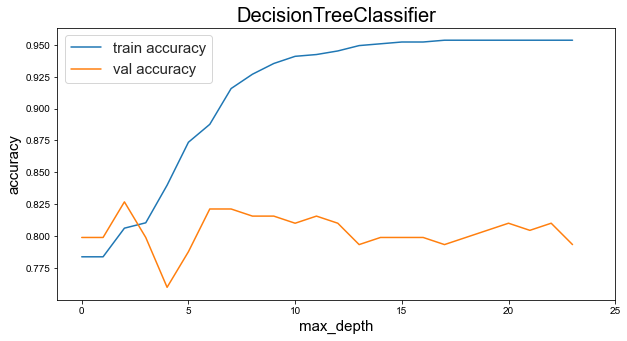

In [46]:
from sklearn.tree import DecisionTreeClassifier

train_accuracies = []
val_accuracies = []

def train_decision_tree(max_depth):
    clf = DecisionTreeClassifier(max_depth=max_depth)
    clf.fit(df_train[x_cols], df_train[y_col])

    train_predictions = clf.predict(df_train[x_cols])

    train_accuracy = metrics.accuracy_score(df_train[y_col], train_predictions)

    val_predictions = clf.predict(df_val[x_cols])

    val_accuracy = metrics.accuracy_score(df_val[y_col], val_predictions)
    
    return clf, train_accuracy, val_accuracy
    
for max_depth in range(1, 25):
    _, train_accuracy, val_accuracy = train_decision_tree(max_depth)
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)
    
plt.figure(figsize=(10, 5))
plt.title("DecisionTreeClassifier", size=20)
sns.set_style("whitegrid")
plt.plot(train_accuracies, label="train accuracy")
plt.plot(val_accuracies, label="val accuracy")
plt.legend(loc="upper left", prop={'size': 15})
plt.xticks(range(0, 26, 5))
plt.xlabel("max_depth", size=15)
plt.ylabel("accuracy", size=15)
plt.show()

Running the above several times, shows that `max_depth=5` is consistently where validation accuracy seems to peak, before random spikes up and down.

In [47]:
clf, train_accuracy, val_accuracy = train_decision_tree(5)
train_accuracy, val_accuracy

(0.8398876404494382, 0.7597765363128491)

#### Submission

In [48]:
clf, train_accuracy, val_accuracy = train_decision_tree(10)
train_accuracy, val_accuracy

(0.9353932584269663, 0.8044692737430168)

In [49]:
dt_test_predictions = clf.predict(df_test_input)

df_submission = pd.DataFrame({
    'PassengerId': df_test['PassengerId'],
    'Survived': dt_test_predictions,
})

df_submission.to_csv('./output/submission-decision-tree-classifier.csv', index=False)

### RandomForestClassifier

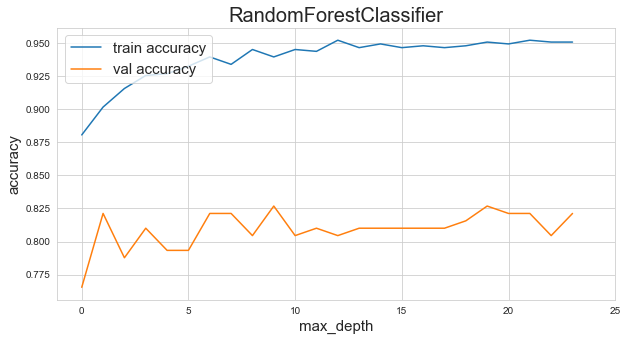

In [50]:
from sklearn.ensemble import RandomForestClassifier

train_accuracies = []
val_accuracies = []

def train_random_forest(n_estimators):
    clf = RandomForestClassifier(n_estimators=n_estimators)
    clf.fit(df_train[x_cols], df_train[y_col].squeeze(1))

    train_predictions = clf.predict(df_train[x_cols])

    train_accuracy = metrics.accuracy_score(df_train[y_col], train_predictions)

    val_predictions = clf.predict(df_val[x_cols])

    val_accuracy = metrics.accuracy_score(df_val[y_col], val_predictions)
    
    return clf, train_accuracy, val_accuracy
    
for n_estimators in range(1, 25):
    _, train_accuracy, val_accuracy = train_random_forest(n_estimators)
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)
    
plt.figure(figsize=(10, 5))
plt.title("RandomForestClassifier", size=20)
sns.set_style("whitegrid")
plt.plot(train_accuracies, label="train accuracy")
plt.plot(val_accuracies, label="val accuracy")
plt.legend(loc="upper left", prop={'size': 15})
plt.xticks(range(0, 26, 5))
plt.xlabel("max_depth", size=15)
plt.ylabel("accuracy", size=15)
plt.show()

Running the above several times, shows that `max_depth=5` is consistently where validation accuracy seems to peak, before random spikes up and down.

#### Submission

In [51]:
clf, train_accuracy, val_accuracy = train_decision_tree(10)
train_accuracy, val_accuracy

(0.9367977528089888, 0.8156424581005587)

In [52]:
rf_test_predictions = clf.predict(df_test_input)

df_submission = pd.DataFrame({
    'PassengerId': df_test['PassengerId'],
    'Survived': rf_test_predictions,
})

df_submission.to_csv('./output/submission-random-forest-classifier.csv', index=False)

### DNN

In [53]:
import torch
from torch import tensor

train_x = tensor(df_train[x_cols].values, dtype=torch.float32)
train_y = tensor(df_train[y_col].values, dtype=torch.float32)
val_x = tensor(df_val[x_cols].values, dtype=torch.float32)
val_y = tensor(df_val[y_col].values, dtype=torch.float32)

(('train_x', train_x.shape, train_x.dtype),
 ('train_y', train_y.shape, train_y.dtype),
 ('val_x', val_x.shape, val_x.dtype),
 ('val_y', val_y.shape, val_y.dtype))

(('train_x', torch.Size([712, 23]), torch.float32),
 ('train_y', torch.Size([712, 1]), torch.float32),
 ('val_x', torch.Size([179, 23]), torch.float32),
 ('val_y', torch.Size([179, 1]), torch.float32))

In [54]:
from sklearn import metrics
from torch import nn, optim
from torch.utils import tensorboard

def train_dnn(n_hidden_units, n_hidden_layers=1, dropout=0.0, learning_rate=1e-4, epochs=10_000):

    hidden_layers = []
    for h in range(1, n_hidden_layers):
        hidden_layers += [
            nn.Linear(in_features=n_hidden_units, out_features=n_hidden_units, bias=True),
            nn.ReLU(),
            nn.Dropout(dropout),
        ]

    model = nn.Sequential(
        nn.Linear(in_features=train_x.shape[-1], out_features=n_hidden_units, bias=True),
        nn.ReLU(),
        nn.Dropout(dropout),
        *hidden_layers,
        nn.Linear(in_features=n_hidden_units, out_features=train_y.shape[-1], bias=True),
        nn.Sigmoid(),
    )

    #for name, param in model.named_parameters():
    #    print(f'params for {name} = {param.shape} {param.dtype}')

    loss_fn = nn.MSELoss()
    optimizer = optim.Adam(params=model.parameters(), lr=learning_rate)

    def calculate_loss(model, loss_fn, x, y, is_train):
        with torch.set_grad_enabled(is_train):
            model.train() if is_train else model.eval() 
            y_hat = model(x)
            loss = loss_fn(y_hat, y)
        assert loss.requires_grad == is_train
        return (y_hat > 0.5), loss

    tb_writer = tensorboard.SummaryWriter(comment=(f'_hu={n_hidden_units}'
                                                   f'_hl={n_hidden_layers}'
                                                   f'_lr={learning_rate}'
                                                   f'_do={dropout}_'))

    for epoch in range(1, epochs + 1):

        train_preds, train_loss = calculate_loss(model, loss_fn, train_x, train_y, is_train=True)

        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()

        if epoch == 1 or epoch % 100 == 0:
            train_acc = metrics.accuracy_score(train_y, train_preds) * 100.
            val_preds, val_loss = calculate_loss(model, loss_fn, val_x, val_y, is_train=False)
            val_acc = metrics.accuracy_score(val_y, val_preds) * 100.

            tb_writer.add_scalar('Loss/train', train_loss, epoch)
            tb_writer.add_scalar('Accuracy/train', train_acc, epoch)
            tb_writer.add_scalar('Loss/val', val_loss, epoch)
            tb_writer.add_scalar('Accuracy/val', val_acc, epoch)

            #print(f'epoch = {epoch}  '
            #      f'train loss = {train_loss:0.4f}  train acc = {train_acc:0.2f}  '
            #      f'val loss = {val_loss:0.4f}  val acc = {val_acc:0.2f}')
            
    model.eval()
    with torch.set_grad_enabled(False):
        train_accuracy = metrics.accuracy_score(train_y, model(train_x) > 0.5)
        val_accuracy = metrics.accuracy_score(val_y, model(val_x) > 0.5)

    return model, train_accuracy, val_accuracy

In [55]:
lr = 1e-4

for h in range(1, 9):
    hidden_units = 2 ** h
    print(f'training dnn : hidden_units={hidden_units} (no dropout)')
    model, _, _ = train_dnn(n_hidden_units=hidden_units, dropout=0.0, learning_rate=lr)

training dnn : hidden_units=2 (no dropout)
training dnn : hidden_units=4 (no dropout)
training dnn : hidden_units=8 (no dropout)
training dnn : hidden_units=16 (no dropout)
training dnn : hidden_units=32 (no dropout)
training dnn : hidden_units=64 (no dropout)
training dnn : hidden_units=128 (no dropout)
training dnn : hidden_units=256 (no dropout)


In [56]:
import numpy as np

lr = 1e-4

for hidden_units in [16, 64]:
    for dropout in np.arange(0.0, 1.1, 0.1):
        print(f'training dnn : hidden_units={hidden_units} dropout={dropout:0.1f}')
        model, _, _ = train_dnn(n_hidden_units=hidden_units, dropout=dropout, learning_rate=lr)

training dnn : hidden_units=16 dropout=0.0
training dnn : hidden_units=16 dropout=0.1
training dnn : hidden_units=16 dropout=0.2
training dnn : hidden_units=16 dropout=0.3
training dnn : hidden_units=16 dropout=0.4
training dnn : hidden_units=16 dropout=0.5
training dnn : hidden_units=16 dropout=0.6
training dnn : hidden_units=16 dropout=0.7
training dnn : hidden_units=16 dropout=0.8
training dnn : hidden_units=16 dropout=0.9
training dnn : hidden_units=16 dropout=1.0
training dnn : hidden_units=64 dropout=0.0
training dnn : hidden_units=64 dropout=0.1
training dnn : hidden_units=64 dropout=0.2
training dnn : hidden_units=64 dropout=0.3
training dnn : hidden_units=64 dropout=0.4
training dnn : hidden_units=64 dropout=0.5
training dnn : hidden_units=64 dropout=0.6
training dnn : hidden_units=64 dropout=0.7
training dnn : hidden_units=64 dropout=0.8
training dnn : hidden_units=64 dropout=0.9
training dnn : hidden_units=64 dropout=1.0


In [57]:
lr = 1e-4
hidden_units = 32
dropout=0.1

for hidden_layers in [1, 2, 3, 4]:
    print(f'training dnn : hidden_units={hidden_units} hidden_layers={hidden_layers} '
          f'dropout={dropout:0.1f}')
    model, _, _ = train_dnn(n_hidden_units=hidden_units, n_hidden_layers=hidden_layers,
                            dropout=dropout, learning_rate=lr)

training dnn : hidden_units=32 hidden_layers=1 dropout=0.1
training dnn : hidden_units=32 hidden_layers=2 dropout=0.1
training dnn : hidden_units=32 hidden_layers=3 dropout=0.1
training dnn : hidden_units=32 hidden_layers=4 dropout=0.1


#### Submission

In [58]:
model, train_accuracy, val_accuracy = train_dnn(n_hidden_units=16, n_hidden_layers=2,
                                                dropout=0.1, learning_rate=1e-4,
                                                epochs=5_000)
train_accuracy, val_accuracy

(0.8426966292134831, 0.8100558659217877)

In [59]:
test_x = tensor(df_test_input[x_cols].values, dtype=torch.float32)

test_x.shape, test_x.dtype

(torch.Size([418, 23]), torch.float32)

In [60]:
with torch.set_grad_enabled(False):
    model.eval()
    y_hat = model(test_x)
    dnn_test_predictions = (y_hat.squeeze(1) > 0.5).to(torch.int)

df_submission = pd.DataFrame({
    'PassengerId': df_test['PassengerId'],
    'Survived': dnn_test_predictions,
})

df_submission.to_csv('./output/submission-dnn.csv', index=False)

### Emsemble

In [61]:
avg_preds = (dt_test_predictions + rf_test_predictions + dnn_test_predictions.numpy()) / 3
emsemble_preds = (avg_preds > 0.5).astype('int')

df_submission = pd.DataFrame({
    'PassengerId': df_test['PassengerId'],
    'Survived': emsemble_preds,
})

df_submission.to_csv('./output/submission-emsemble.csv', index=False)

## Conclusion

Best score was `0.77751` from the `DecisionTreeClassifier` and this consistently scored best highest. It improved as I cleaned the data. Possibly with more data cleaning and analysis could bump it a little more, but I think I've done enough with this one for now.